In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

In [12]:
import pandas as pd
import numpy as np

In [14]:
df = pd.DataFrame(X, columns = feature_names)
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

### 2.1.1 - Database information 

In [19]:
df.isnull().sum()

The missing values for each column are:


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [21]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

There are not missing values and the dataset is composed by 178 rows with 13 columns

### 2.1.2 - Train the classifier 

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [24]:
clf.fit(X, y)

DecisionTreeClassifier()

### 2.1.3 - Tree Visualization

In [32]:
from sklearn.tree import export_graphviz
dot_code = export_graphviz(clf, feature_names=feature_names)
#print(dot_code)

In [33]:
import matplotlib.pyplot as plt

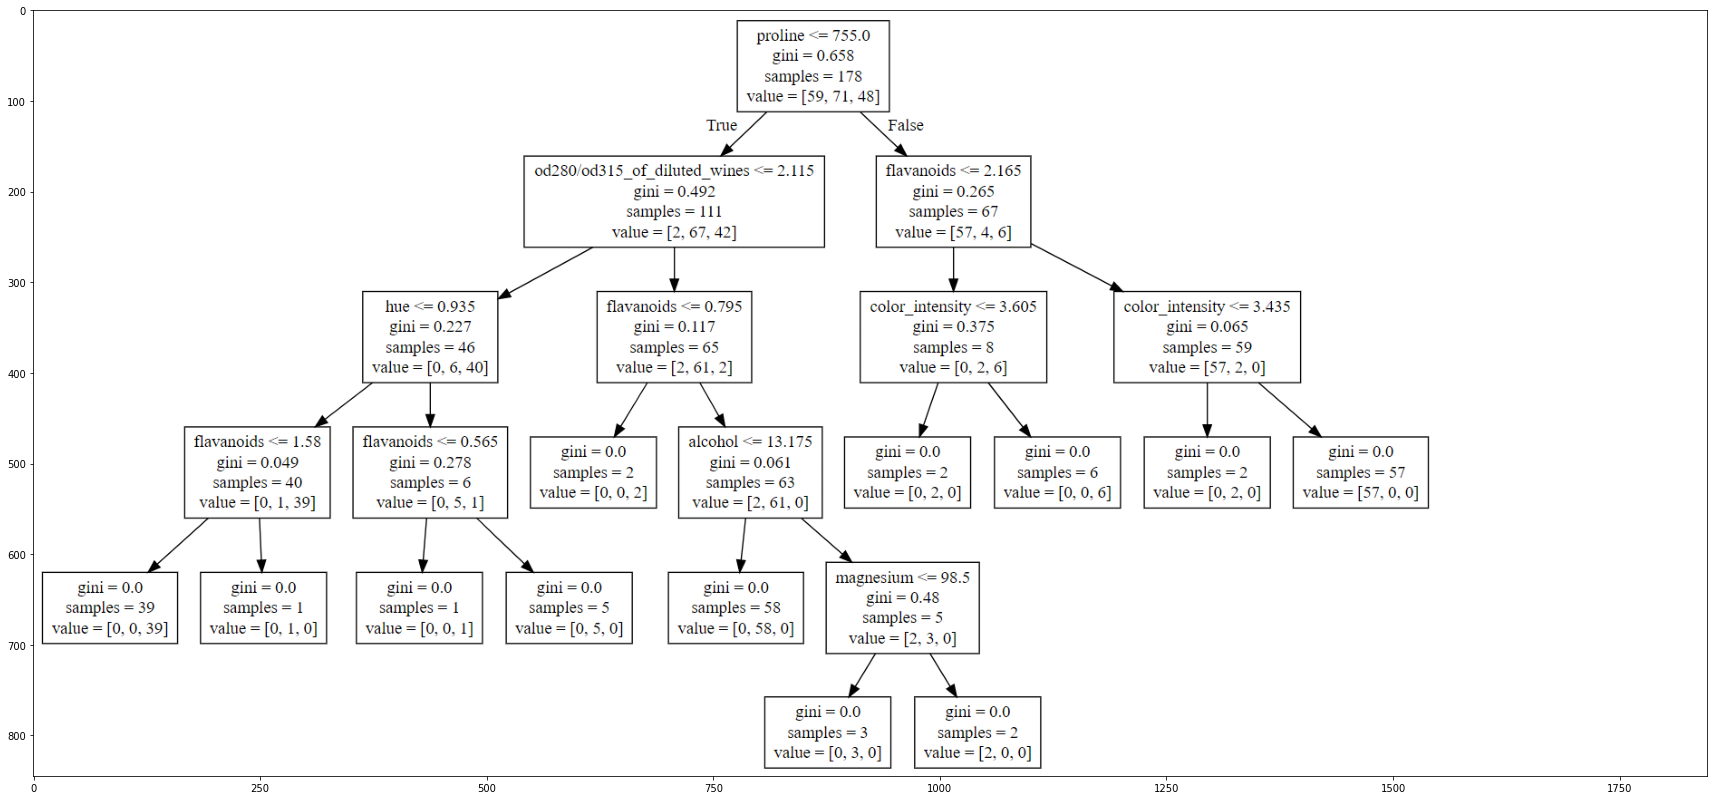

In [41]:
img = plt.imread(r"C:\Users\matti\Desktop\Magistrale\Data science lab\Labs\DSL-Lab\Lab6\Tree.PNG")
plt.figure(figsize = [30,30])
plt.imshow(img)
plt.show()

As we can see in the graph the Tree is too depth, so it can distinguish too many classes so it's fully depth. We know that there are only three different class so it could be a good idea to stop it at stpe 2 where there are 4 leaf nodes. So we can operate with a pre-pruinig, stop before it grows too much, or post-pruining.

### 2.1.4 - Prediction and accuracy 

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
y_pred = clf.predict(X)
score = accuracy_score(y, y_pred)

In [50]:
score

1.0

The score is perfect. This is because we've made a prediction based on the dataset used for learning the model. Our model could be overfitted, this means that it has trained too much on the training dataset so our model is no more able to generalized data. In this way, it works perfectly with the training set but with other data could works really bad.

### 2.1.5 - Split the dataset into training and test set 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

array([[1.317e+01, 5.190e+00, 2.320e+00, ..., 6.000e-01, 1.480e+00,
        7.250e+02],
       [1.483e+01, 1.640e+00, 2.170e+00, ..., 1.080e+00, 2.850e+00,
        1.045e+03],
       [1.330e+01, 1.720e+00, 2.140e+00, ..., 1.020e+00, 2.770e+00,
        1.285e+03],
       ...,
       [1.410e+01, 2.020e+00, 2.400e+00, ..., 1.070e+00, 2.750e+00,
        1.060e+03],
       [1.245e+01, 3.030e+00, 2.640e+00, ..., 6.700e-01, 1.730e+00,
        8.800e+02],
       [1.222e+01, 1.290e+00, 1.940e+00, ..., 8.600e-01, 3.020e+00,
        3.120e+02]])

### 2.1.6 - Training splitted dataset

In [57]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

y_predicted = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
p, r, f1, s = precision_recall_fscore_support(y_test, y_predicted)
print(f"The number of predicted row is {y_predicted.size}")
print("Accuracy: ", accuracy)
result = pd.DataFrame([p,r,f1,s], index = ['Precision', 'Recall', 'F_score', 'Support'], columns=['0','1','2'])

result

The number of predicted row is 36
Accuracy:  0.9444444444444444


0          1         2
Precision   1.000000   0.882353  1.000000
Recall      0.928571   1.000000  0.857143
F_score     0.962963   0.937500  0.923077
Support    14.000000  15.000000  7.000000

##### With classification_report we don't need a dataframe

In [58]:
from sklearn.metrics import classification_report

In [61]:
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.94        15
           2       1.00      0.86      0.92         7

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### 2.1.7 - Evaluate different CLF

In [73]:
from sklearn.model_selection import ParameterGrid

params = {
"max_depth": [None, 2, 4, 8],
"splitter": ["best", "random"]
}
accuracy_result = {}

for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    y_p = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_p)
    accuracy_result[f"{config}"] = accuracy
accuracy_result

{"{'max_depth': None, 'splitter': 'best'}": 0.9444444444444444,
 "{'max_depth': None, 'splitter': 'random'}": 0.9166666666666666,
 "{'max_depth': 2, 'splitter': 'best'}": 0.9444444444444444,
 "{'max_depth': 2, 'splitter': 'random'}": 0.7777777777777778,
 "{'max_depth': 4, 'splitter': 'best'}": 0.9444444444444444,
 "{'max_depth': 4, 'splitter': 'random'}": 0.7777777777777778,
 "{'max_depth': 8, 'splitter': 'best'}": 0.9444444444444444,
 "{'max_depth': 8, 'splitter': 'random'}": 0.8888888888888888}

In [85]:
highest_acc = max(accuracy_result.values())
best_hyperparameters = [k for k,v in accuracy_result.items() if v == highest_acc]
print(f"The parameteres for whom accuracy is {highest_acc} are: ")
best_hyperparameters

The parameteres for whom accuracy is 0.9444444444444444 are: 


["{'max_depth': None, 'splitter': 'best'}",
 "{'max_depth': 2, 'splitter': 'best'}",
 "{'max_depth': 4, 'splitter': 'best'}",
 "{'max_depth': 8, 'splitter': 'best'}"]

We can easily see that the best accuracy is obtained for the 'best' splitter, but maybe has more computational cost, but our dataset is quite small so we don't care. For the 'max_depth' we obtain 4 diffent values. I think that the best is the lower so 2. In this way our model ia able to generalized.
Accuracy is not a good metrics to qualify our model so we can compute other metrics.

In [88]:
for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    y_p = clf.predict(X_test)
    print(f"{config}")
    print(classification_report(y_test, y_p))
    print()

{'max_depth': None, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.94        15
           2       1.00      0.86      0.92         7

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


{'max_depth': None, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.88      1.00      0.93         7

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


{'max_depth': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
        

### 2.1.8 - Cross validation K-Fold

In [91]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split

best_accuracy = 0
best_model = None

for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]
    for config in ParameterGrid(params):
        
        clf = DecisionTreeClassifier(**config)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = clf

# try it
print(f"Best accuracy: {best_accuracy}")
y_pred = best_model.predict(X_test)
best_report = classification_report(y_test, y_pred)
print(best_report)

Best accuracy: 1.0
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.76      0.93      0.84        14
           2       1.00      0.67      0.80         9

    accuracy                           0.86        36
   macro avg       0.90      0.84      0.85        36
weighted avg       0.88      0.86      0.86        36

